In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

df = pd.read_csv('../data_analysis/cleaned_data.csv')
df.head(

In [23]:
df = pd.read_csv('../data_analysis/cleaned_data.csv')
df.head()

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
0,20320744,1150,APARTMENT,APARTMENT,575000,residential_sale,3,160.0,1.0,1.0,40.0,1.0,290.000000,290.000000,1091.083161,2.707052,0.000000,dfGOOD,single
1,20317718,9000,APARTMENT,APARTMENT,390000,residential_sale,3,96.0,1.0,1.0,29.0,1.0,519.796445,519.796445,1091.083161,2.000000,0.000000,AS_NEW,compound
2,20315842,9051,APARTMENT,APARTMENT,260000,residential_sale,1,76.0,1.0,1.0,12.0,1.0,519.796445,519.796445,1091.083161,2.707052,0.048839,GOOD,compound
3,20315799,9051,APARTMENT,APARTMENT,325000,residential_sale,1,81.0,1.0,1.0,13.0,1.0,519.796445,519.796445,1091.083161,2.707052,0.048839,GOOD,compound
4,20315776,9051,APARTMENT,APARTMENT,365000,residential_sale,3,101.0,1.0,1.0,13.0,1.0,519.796445,519.796445,1091.083161,2.707052,0.048839,GOOD,compound


### Plot the outliers

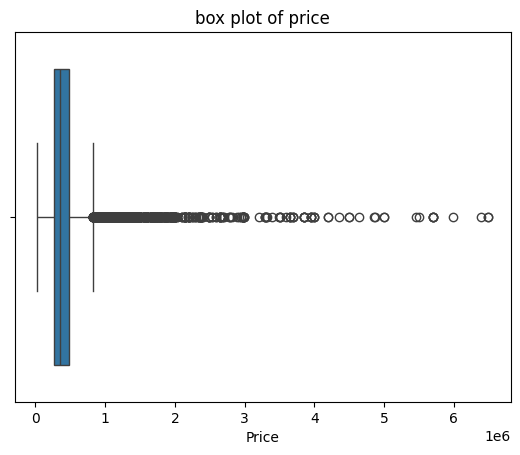

In [24]:
# create a box plot to visualize outliers for price
sn.boxplot(x=df["Price"])
plt.title("box plot of price")
plt.show()

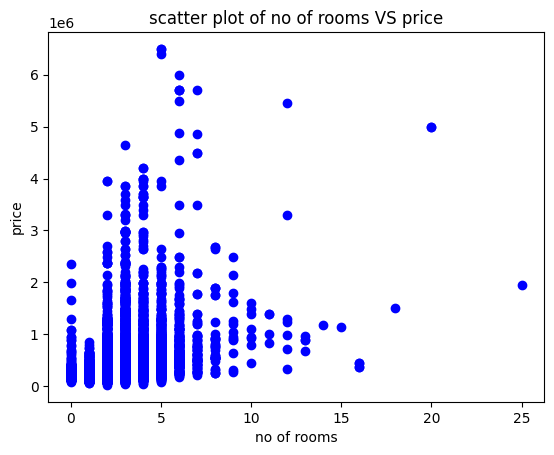

In [25]:
#scatter plot to check relationships between  price and n of rooms
plt.scatter(df["Number of rooms"],df["Price"], color="blue")
plt.title("scatter plot of no of rooms VS price")
plt.xlabel("no of rooms")
plt.ylabel("price")
plt.show()


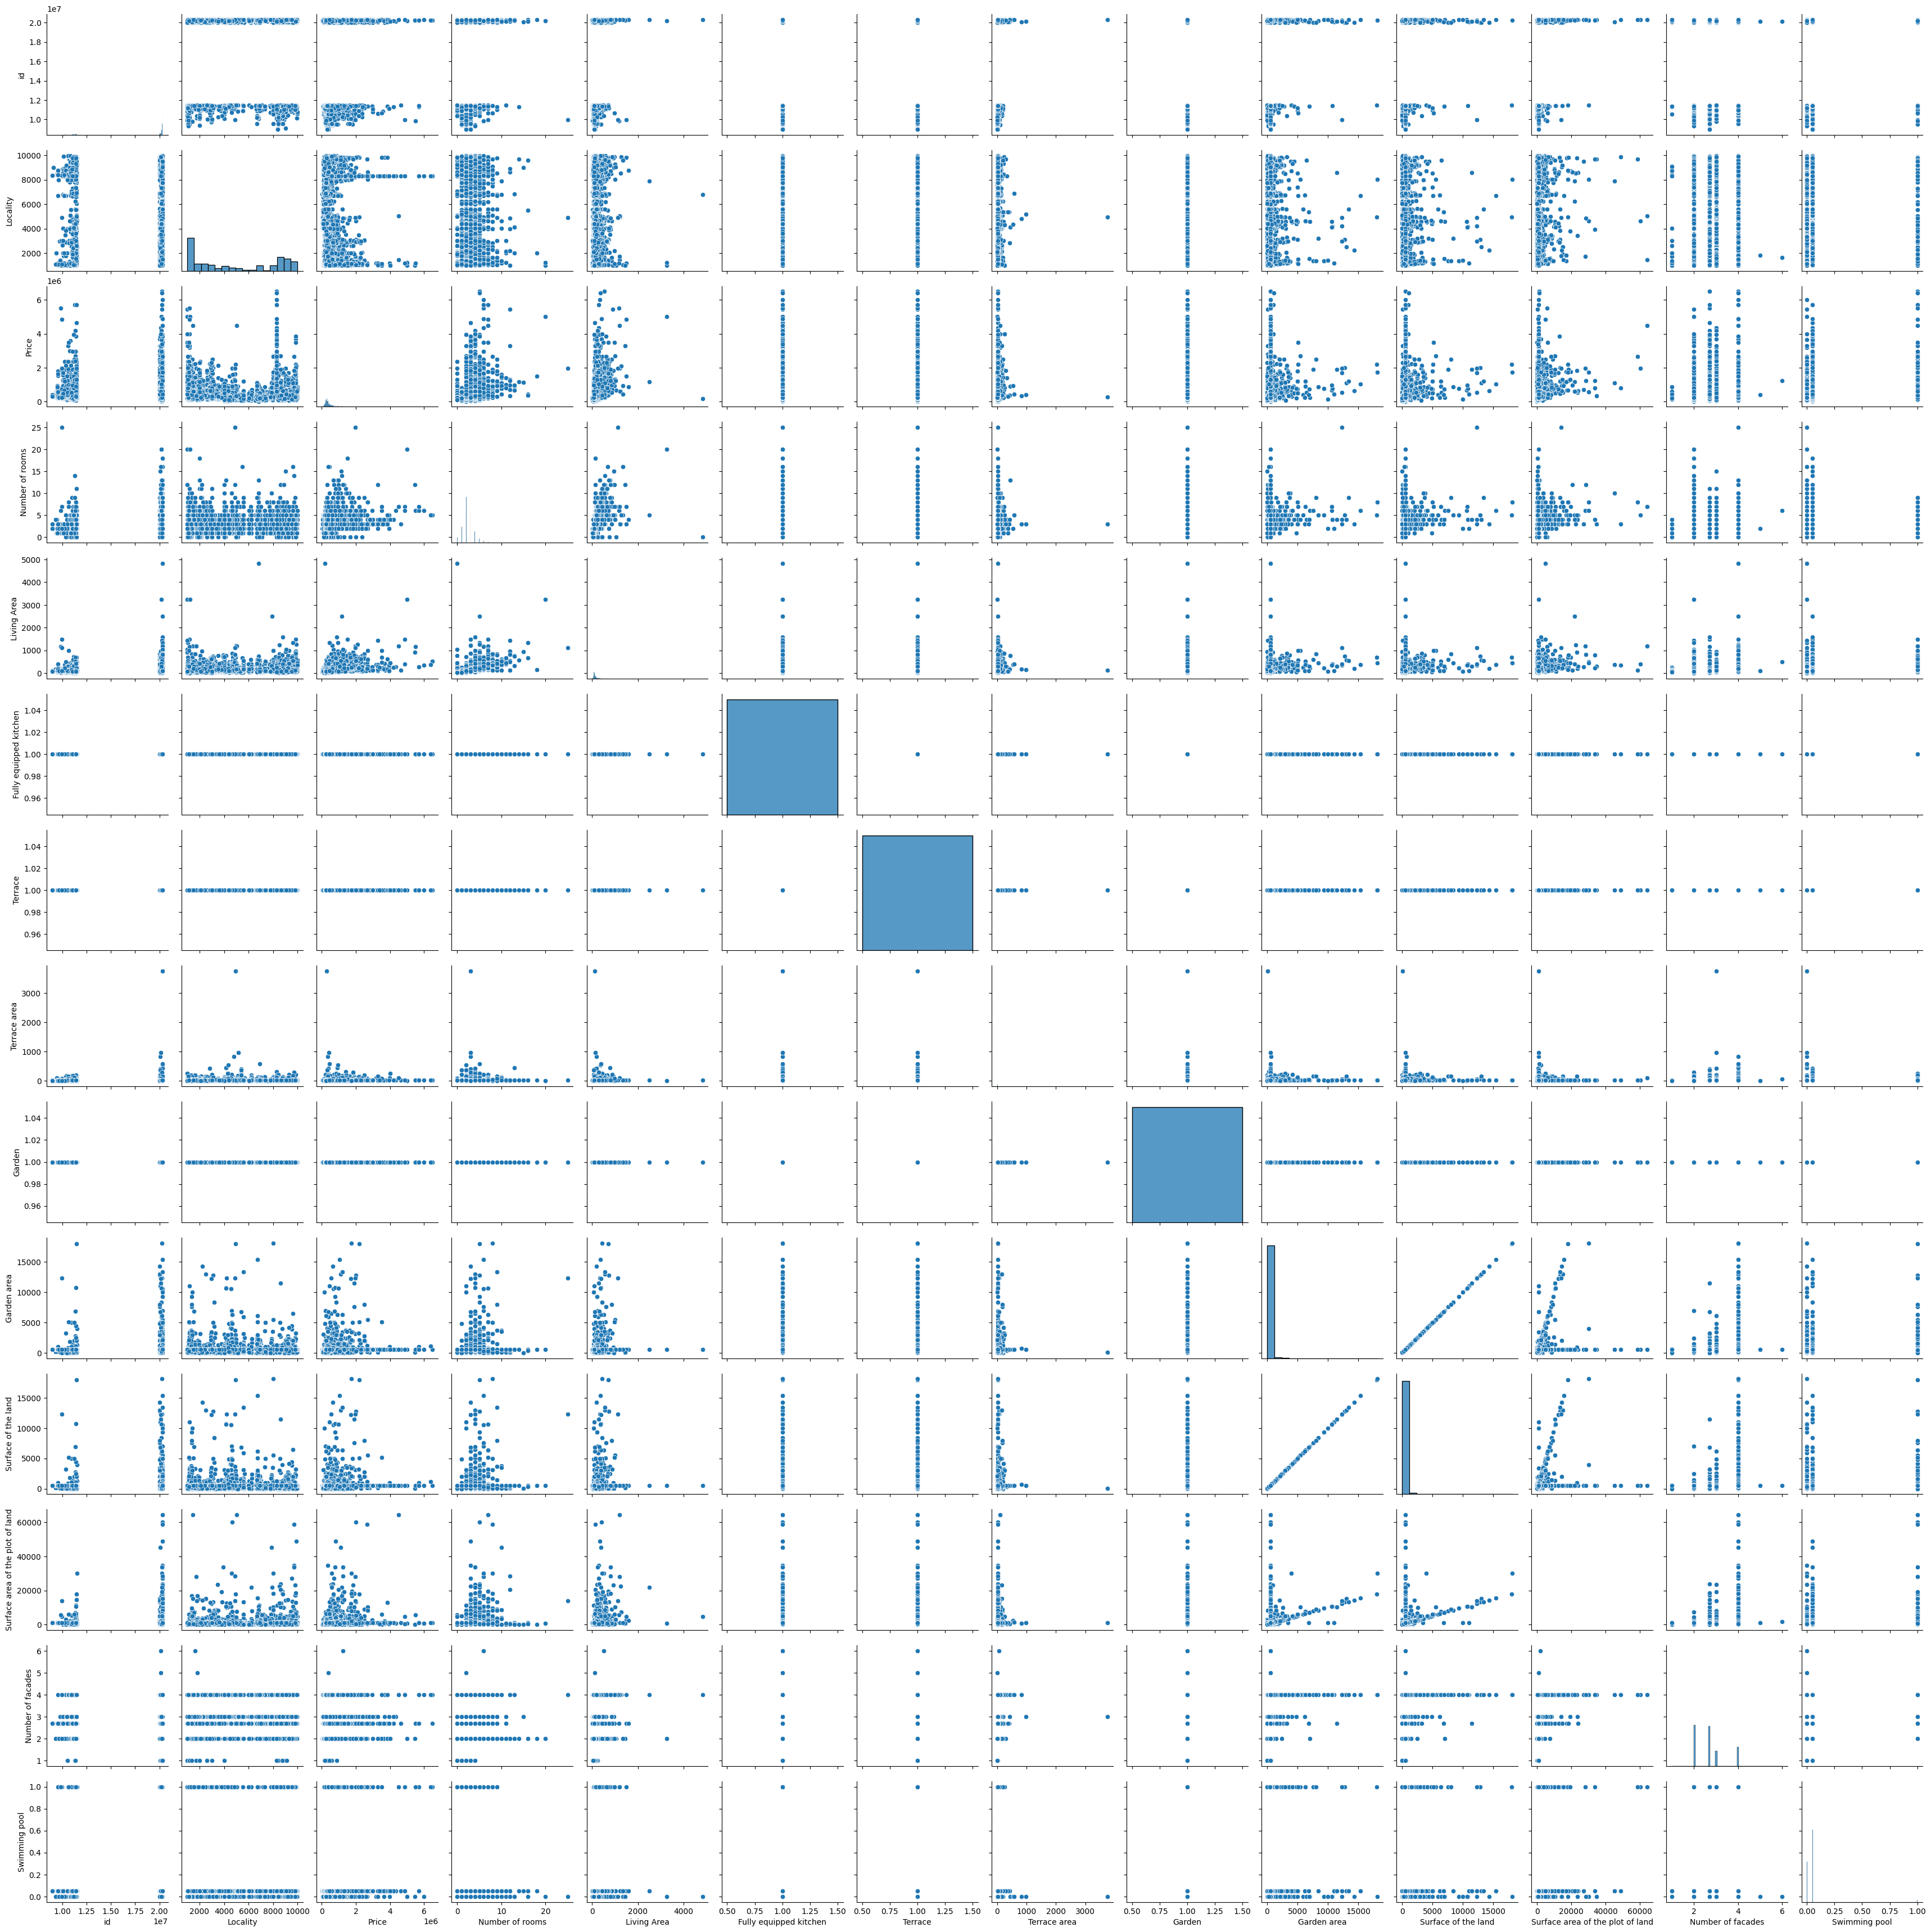

In [26]:
#using pair plot for multiple variables
sn.pairplot(df)
plt.show()

### Which variables would you delete and why

'Furnished','Fireplace'


### What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)


In [31]:
#lets create price_per_square_meter column
df["Price per square meter"] = df["Price"]/df["Living Area"]

# Example mapping for municipality to region
municipality_to_region = {
  
    '1050.0': 'Brussel',
    '2000.0': 'Antwerpen',

}

# Map municipalities to regions
df['Region'] = df['Locality'].map(municipality_to_region).fillna("unknown")

# Calculate metrics for each municipality
municipality_stats = df.groupby(['Locality', 'Region']).agg(
    Average_Price=('Price', 'mean'),
    Median_Price=('Price', 'median'),
    Average_Price_per_sqaure_meter=('Price per square meter', 'mean')
).reset_index()

# Separate by region
belgium_stats = municipality_stats  # All municipalities
wallonia_stats = municipality_stats[municipality_stats['Region'] == 'Brussel']
flanders_stats = municipality_stats[municipality_stats['Region'] == 'Antwerpen']

# Sort for Most and Least Expensive
most_expensive_belgium = belgium_stats.sort_values(by='Average_Price', ascending=False).head(10)
less_expensive_belgium = belgium_stats.sort_values(by='Average_Price', ascending=True).head(10)

most_expensive_wallonia = wallonia_stats.sort_values(by='Average_Price', ascending=False).head(10)
less_expensive_wallonia = wallonia_stats.sort_values(by='Average_Price', ascending=True).head(10)

most_expensive_flanders = flanders_stats.sort_values(by='Average_Price', ascending=False).head(10)
less_expensive_flanders = flanders_stats.sort_values(by='Average_Price', ascending=True).head(10)

print(df["Region"].value_counts())
# Display Results
print("Most Expensive Municipalities in Belgium:\n", most_expensive_belgium)
print("\nLess Expensive Municipalities in Belgium:\n", less_expensive_belgium)

print("\nMost Expensive Municipalities in Wallonia:\n", most_expensive_wallonia)
print("\nLess Expensive Municipalities in Wallonia:\n", less_expensive_wallonia)

print("\nMost Expensive Municipalities in Flanders:\n", most_expensive_flanders)
print("\nLess Expensive Municipalities in Flanders:\n", less_expensive_flanders)

Region
unknown    13965
Name: count, dtype: int64
Most Expensive Municipalities in Belgium:
      Locality   Region  Average_Price  Median_Price  \
706      9681  unknown   2.650000e+06     2650000.0   
717      9831  unknown   2.037714e+06     1950000.0   
357      4730  unknown   1.590000e+06     1590000.0   
24       1310  unknown   1.557478e+06     1875000.0   
569      8300  unknown   1.470749e+06     1050000.0   
40       1380  unknown   1.368429e+06     1480000.0   
53       1473  unknown   1.350000e+06     1350000.0   
615      8740  unknown   1.311000e+06     1895000.0   
364      4850  unknown   1.300000e+06     1300000.0   
137      2290  unknown   1.249000e+06     1249000.0   

     Average_Price_per_sqaure_meter  
706                    19280.607058  
717                     4985.704412  
357                     2890.909091  
24                      5953.436096  
569                    11850.801290  
40                      3305.212605  
53                      4966.859753

In [ ]:
print(df["Locality"]).unique()